# Análisis y Estrategia de Retención de Clientes para Model Fitness

__Descarga de datos y Análisis Exploratorio de Datos (EDA):__

- __Descargar__ el conjunto de datos desde `/datasets/gym_churn_us.csv`
- Realizar un __EDA__ para identificar características ausentes, promedios y desviaciones estándar
- Observar __valores medios__ para clientes que se fueron y se quedaron
- Crear __histogramas__, __distribuciones__ y __matriz de correlación__

__Modelo de Predicción de Cancelación:__

- Construir un modelo de __clasificación binaria__ para predecir cancelación
- Dividir los datos en conjuntos de __entrenamiento__ y __validación__
- Entrenar modelos de __regresión logística__ y __bosque aleatorio__
- Evaluar la __exactitud__, __precisión__ y __recall__ para comparar modelos
- Crear __clústeres de usuarios__
- Entrenar __modelo K-means__ para predecir clústeres de clientes
- __Estandarizar__ los datos y usar `linkage()` para dendrograma
- Analizar valores medios y distribuciones de __características por clúster__
- Calcular la __tasa de cancelación__ por clúster

__Conclusiones y Recomendaciones:__

- __Identificar__ grupos de clientes propensos a la cancelación
- Sugerir __medidas de retención__ basadas en los hallazgos del modelo y clústeres
- Proporcionar recomendaciones de marketing específicas para __mejorar la retención de clientes__

__Datos del Usuario del Mes Anterior:__

- `gender` __Género__ del usuario
- `Near_Location` Indica si el usuario vive o trabaja en el __vecindario del gimnasio__
- `Partner` Indica si el usuario trabaja en una __compañía asociada__
- `Promo_friends` Indica si el usuario se inscribió con una __oferta__ 'trae a un amigo'
- `Phone` Indica si el usuario proporcionó su número de __teléfono__
- `Age` __Edad__ del usuario
- `Lifetime` Tiempo en meses desde que el usuario llegó por __primera vez__ al gimnasio

__Datos del Registro de Visitas y Compras:__

- `Contract_period` Duración del __contrato__ (1 mes, 3 meses, 6 meses o 1 año)
- `Month_to_end_contract` Meses restantes hasta que __expire__ el contrato
- `Group_visits` Indica si el usuario participa en __sesiones grupales__
- `Avg_class_frequency_total` Frecuencia media de __visitas por semana__ a lo largo de la vida del cliente
- `Avg_class_frequency_current_month` Frecuencia media de visitas por semana durante el __mes actual__
- `Avg_additional_charges_total` Cantidad total de __dinero gastado__ en otros servicios del gimnasio

__Variable Objetivo (Churn):__

- `Churn` Indica si __el usuario canceló__ su membresía en el mes en cuestión

## Importar librerias y archivo

In [1]:
# cargar librerías

import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
warnings.filterwarnings('ignore')

## Estudio de la información general

In [3]:
# importar el archivo y crear una copia

data_original = pd.read_csv('./gym_churn_us.csv')

data = data_original.copy()

In [4]:
# mostrar el número de las filas y las columnas en el DataFrame

data.shape

(4000, 14)

In [5]:
# imprimir las informaciones sobre el DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# cambiar los nombres de las columnas a minúsculas para facilitar el manejo de los datos

data.columns = data.columns.str.lower()

In [7]:
# imprimir una muestra de las primeras filas del DataFrame

data.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Evaluación

- En el DataFrame se encuentran __4000 filas__ y __14 columnas__
- No hay __valores ausentes__
- Hicimos una __copia del DataFrame__ para no modificar los datos originales
- Los datos son todos valores numéricos __enteros__ y __flotantes__
- Algunas columans son __series booleanas__
- Convertimos los __nombres de las columnas__ en minúsculas

## Distribución de los datos

### Género de los usuarios

In [8]:
# distribución de los usuarios en función de su género

gender_by_churn = pd.crosstab(data['gender'], data['churn'])

print(gender_by_churn)

churn      0    1
gender           
0       1440  519
1       1499  542


### Ubicación de los usuarios

In [9]:
# distribución de los usuarios en función de su ubicación

loc_by_churn = pd.crosstab(data['near_location'], data['churn'])

print(loc_by_churn)

churn             0    1
near_location           
0               373  246
1              2566  815


### Usuarios asociados

In [10]:
# distribución de los usuarios en función de `partner`

partner_by_churn = pd.crosstab(data['partner'], data['churn'])

print(partner_by_churn)

churn       0    1
partner           
0        1369  684
1        1570  377


### Usuarios que aceptaron la oferta 'Trae un amigo'

In [11]:
# distribución de los usuarios en función de `promo`

promo_by_churn = pd.crosstab(data['promo_friends'], data['churn'])

print(promo_by_churn)

churn             0    1
promo_friends           
0              1900  866
1              1039  195


### Usuarios que proporcionaron su número de teléfono

In [12]:
# distribución de los usuarios en función de `phone`

phone_by_churn = pd.crosstab(data['phone'], data['churn'])

print(phone_by_churn)

churn     0    1
phone           
0       283  103
1      2656  958


### Plazo del contrato de los usuarios

In [13]:
# distribución de los usuarios en función de `contract_period`

contract_by_churn = pd.crosstab(data['contract_period'], data['churn'])

print(contract_by_churn)

churn               0    1
contract_period           
1                1273  934
6                 729  104
12                937   23


### Usuarios que participaron en actividades de grupo

In [14]:
# distribución de los usuarios en función de `group_visits`

group_by_churn = pd.crosstab(data['group_visits'], data['churn'])

print(group_by_churn)

churn            0    1
group_visits           
0             1575  776
1             1364  285


### Edad de los usuarios

In [15]:
# agregar una nueva columna `age_group` al DataFrame

bins = [18, 35, 60]
labels = ['18-35', '35-60']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

In [16]:
# distribución de los usuarios en función de `group_visits`

age_by_churn = pd.crosstab(data['age_group'], data['churn'])

print(age_by_churn)

churn         0     1
age_group            
18-35      2849  1060
35-60        90     1


### Dinero gastado en servicios alternativos

In [17]:
# resumen estadístico de `avg_additional_charges_total`

data['avg_additional_charges_total'].describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

In [18]:
# agregar una nueva columna `charges_group` al DataFrame

bins = [0, 100, 300, 500, float('inf')]
labels = ['0-100', '100-300', '300-500', '500+']

data['charges_group'] = pd.cut(data['avg_additional_charges_total'], bins=bins, labels=labels, include_lowest=True)

In [19]:
# distribución de los usuarios en función de `charges_group`

charge_by_churn = pd.crosstab(data['charges_group'], data['churn'])

print(charge_by_churn)

churn             0    1
charges_group           
0-100           943  509
100-300        1720  537
300-500         273   15
500+              3    0


### Plazo del contrato 

In [20]:
# resumen estadístico de `month_to_end_contract`

data['month_to_end_contract'].describe()

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

In [21]:
# agregar una nueva columna `contract_duration_group` al DataFrame

bins = [1, 3, 6, 12]
labels = ['1-3', '3-6', '6-12']

data['contract_duration_group'] = pd.cut(data['month_to_end_contract'], bins=bins, labels=labels, include_lowest=True)

In [22]:
# distribución de los usuarios en función de `charges_group`

contract_by_churn = pd.crosstab(data['contract_duration_group'], data['churn'])

print(contract_by_churn)

churn                       0    1
contract_duration_group           
1-3                      1307  937
3-6                       731  102
6-12                      901   22


### Lifetime de los usuarios

In [23]:
# resumen estadístico de `month_to_end_contract`

data['lifetime'].describe()

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

In [24]:
# agregar una nueva columna `contract_duration_group` al DataFrame

bins = [1, 7, 15, 30, float('inf')]
labels = ['1-7', '7-15', '15-30', '30+']

data['lifetime_group'] = pd.cut(data['lifetime'], bins=bins, labels=labels, include_lowest=True)

In [25]:
# distribución de los usuarios en función de `lifetime`

lifetime_by_churn = pd.crosstab(data['lifetime_group'], data['churn'])

print(lifetime_by_churn)

churn              0    1
lifetime_group           
1-7             2330  656
7-15             462    2
15-30             62    0
30+                1    0


### Frecuencia media de visitas por semana

In [26]:
# resumen estadístico de `avg_class_frequency_current_month`

data['avg_class_frequency_current_month'].describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

In [27]:
# agregar una nueva columna `frequency_group` al DataFrame

bins = [0, 3, 5, float('inf')]
labels = ['menos de 3', '3-5', 'más de 5']

data['frequency_group'] = pd.cut(data['avg_class_frequency_current_month'], bins=bins, labels=labels, include_lowest=True)

In [28]:
# distribución de los usuarios en función de `avg_class_frequency_current_month`

frequency_by_churn = pd.crosstab(data['frequency_group'], data['churn'])

print(frequency_by_churn)

churn               0     1
frequency_group            
menos de 3       2421  1048
3-5               514    13
más de 5            4     0


### Evaluación

- En esta sección podemos analizar la __distribución de los datos__
- A través de __tablas cruzadas__ es posible analizar la distribución en función de `churn`
- Solo estamos visualizando las __muestra originales__ de los datos, ahora tenemos que __normalizarlos__
- Datos normalizados nos permitirán encontrar la __proporción de churn__ por categorías de usuarios

## Visualizar los datos

### Distribución de características de los usuarios por churn 

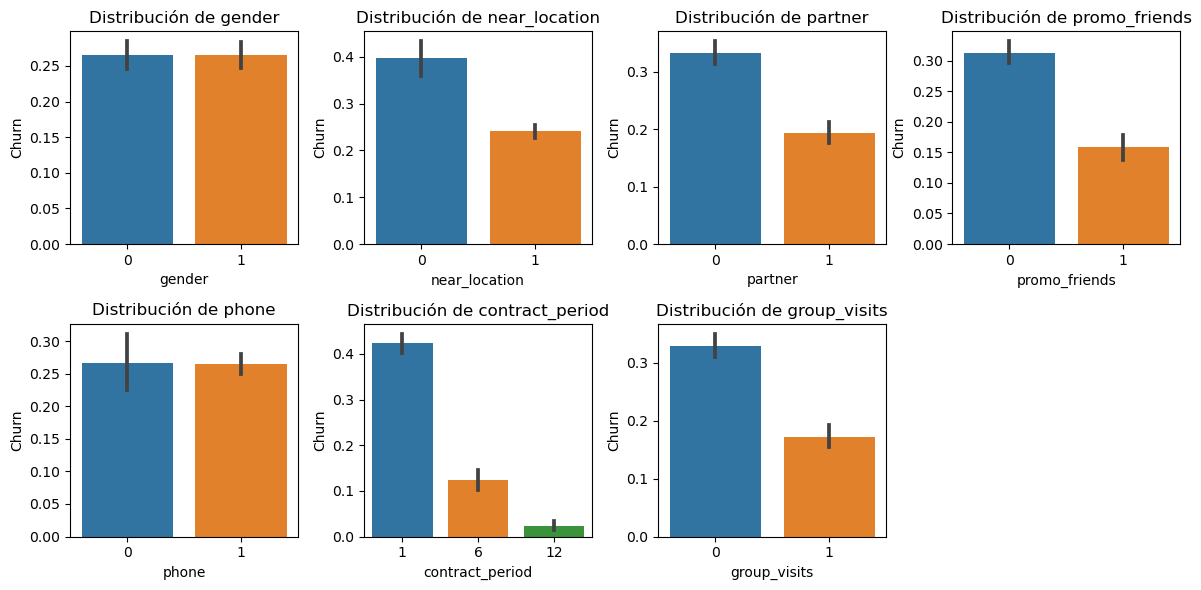

In [29]:
# crear un histogramas diferenciando según la tasa de cancelación

columnas_categoricas = [
    'gender', 'near_location', 'partner', 'promo_friends', 'phone',
    'contract_period', 'group_visits'
]

data_categoricos = data[columnas_categoricas+['churn']]

num_cols = 4
num_rows = math.ceil(len(columnas_categoricas) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categoricas):
    row_idx = i // num_cols
    col_idx = i % num_cols

    sns.barplot(data=data_categoricos, x=col, y='churn', ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Churn')
    axes[row_idx, col_idx].set_title(f'Distribución de {col}')
    
    axes[row_idx, col_idx].figure.set_size_inches(12, 6)

for i in range(len(columnas_categoricas), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.show()

#for column in df.columns:
    #df.groupby(column)["churn"].mean()

### Evaluación

- Generamos __histogramas__ de los __valores categóricos en función de `churn`
- Esta visualización ya nos ayuda a identificar algunos grupos con __riesgo de cancelación__
- También es claro cuales características __no afectan__ el churn de los usuarios

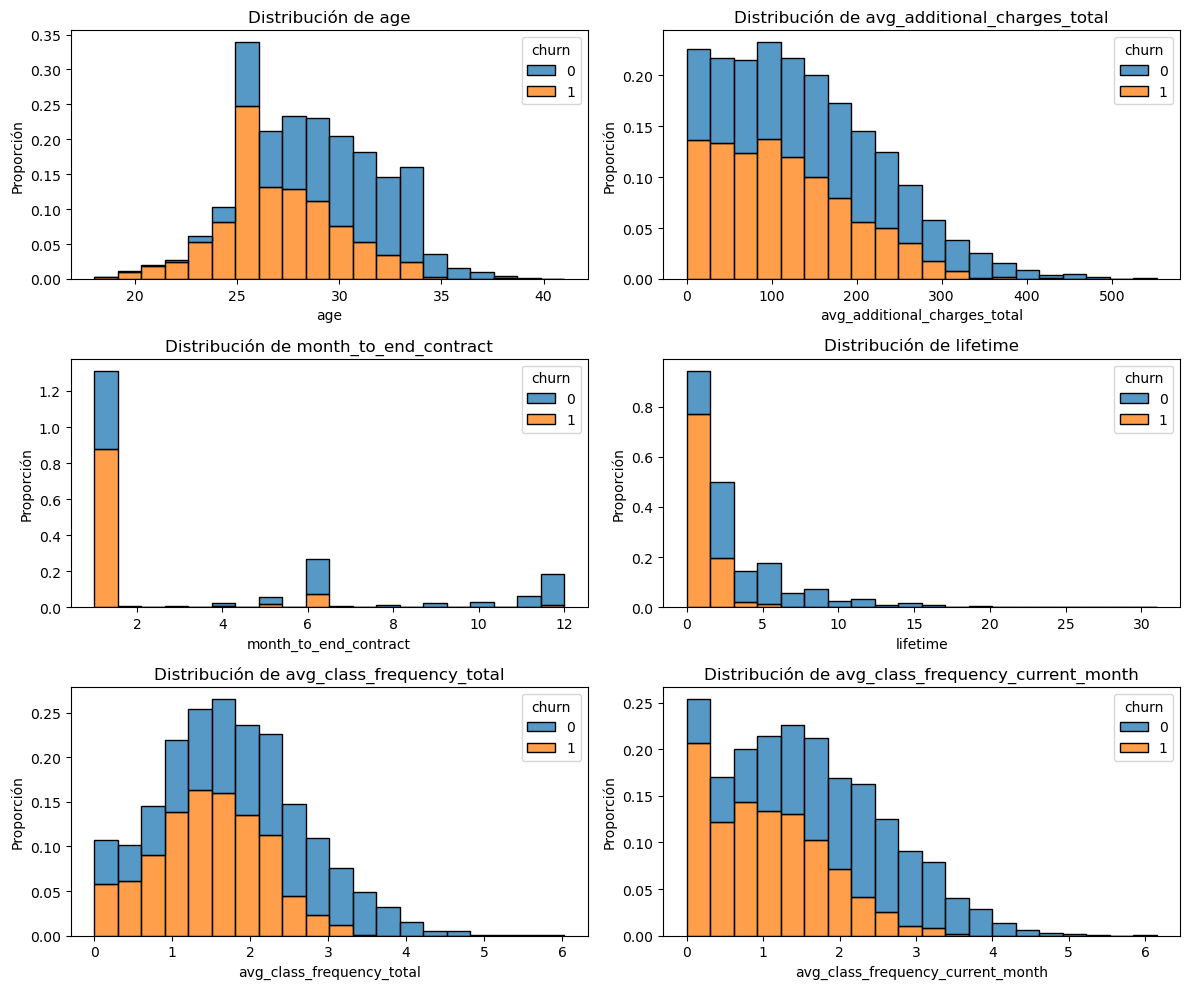

In [30]:
# crear un histogramas diferenciando según la tasa de cancelación

columnas_continuas = [
    'age', 'avg_additional_charges_total',
    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
    'avg_class_frequency_current_month'
]

data_continuos = data[columnas_continuas+['churn']]

num_cols = 2
num_rows = math.ceil(len(columnas_continuas) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_continuas):
    row_idx = i // num_cols
    col_idx = i % num_cols

    sns.histplot(
        data_continuos, x=col, hue='churn', multiple='stack', 
        bins=20, stat='probability', common_norm=False,
        ax=axes[row_idx, col_idx]
    )

    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Proporción')
    axes[row_idx, col_idx].set_title(f'Distribución de {col}')

    axes[row_idx, col_idx].figure.set_size_inches(12, 10)
    
for i in range(len(columnas_continuas), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.show()

### Evaluación

- Generamos __histogramas__ de los __valores continuos__ en función de `churn`
- Esta visualización nos permite observar la __proporción__ entre los dos grupos (`churn`=__False__, `churn`=__True__)
- Esta también es una pista para evaluar cuales __características__ son las __más importantes__
- Las barras azules representan a los usuarios que no cancelaron
- Las barras naranjas representan a los usuarios que cancelaron
- Los usuarios que gastaron más y participaron en más actividades grupales tienen menos __probabilidades de cancelar__

### Matriz de correlación

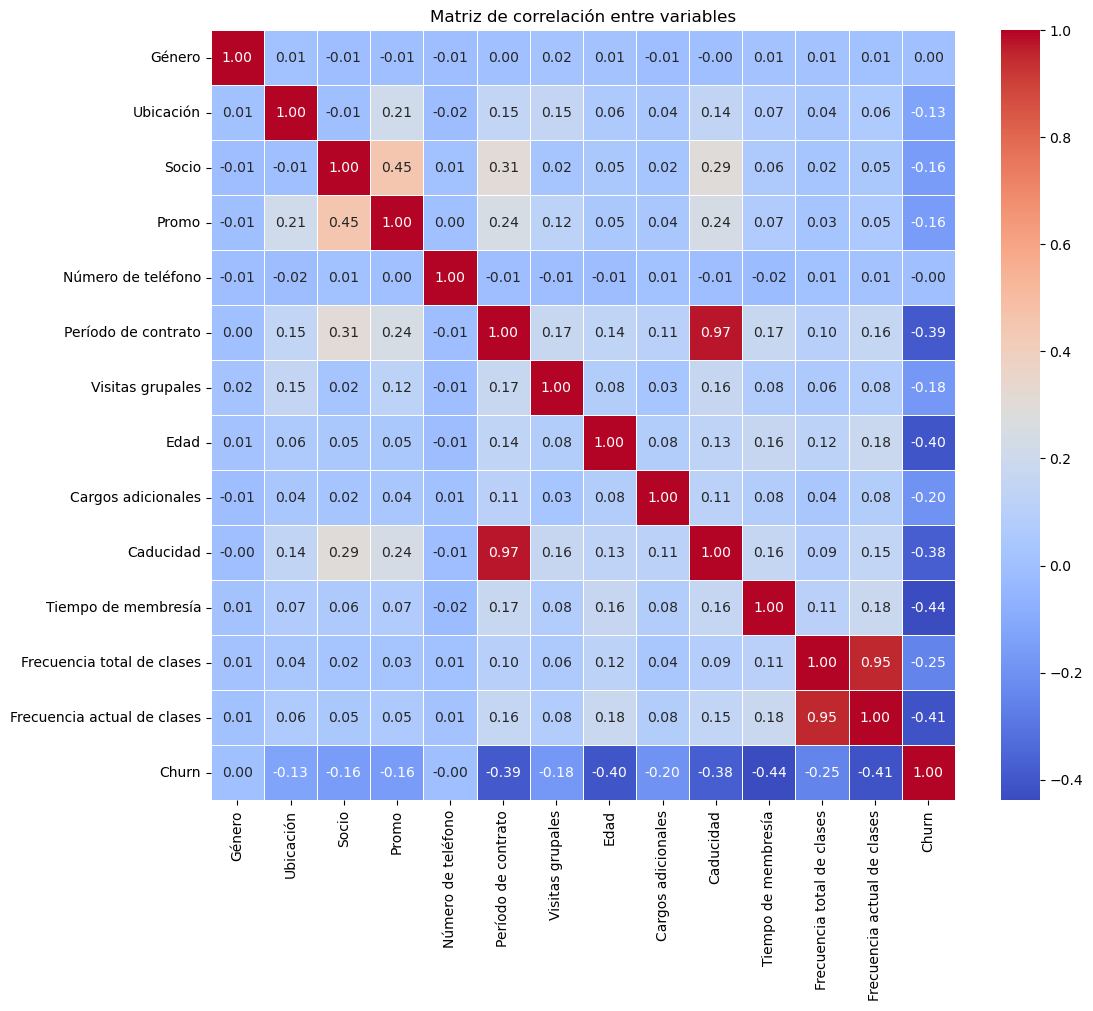

In [31]:
# visualizar la matriz de correlación usando un mapa de calor

columnas_originales = [
    'gender', 'near_location', 'partner', 'promo_friends', 'phone',
    'contract_period', 'group_visits', 'age', 'avg_additional_charges_total',
    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
    'avg_class_frequency_current_month', 'churn'
]

nuevas_etiquetas = ['Género', 'Ubicación', 'Socio', 'Promo', 'Número de teléfono',
                    'Período de contrato', 'Visitas grupales', 'Edad', 'Cargos adicionales', 
                    'Caducidad', 'Tiempo de membresía', 'Frecuencia total de clases',
                    'Frecuencia actual de clases', 'Churn']

data_originales = data[columnas_originales]
correlation_matrix = data_originales.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            xticklabels=nuevas_etiquetas, yticklabels=nuevas_etiquetas)

plt.title('Matriz de correlación entre variables')

plt.show()

### Evaluación

- Creamos una __matriz de correlación__ entre todas las variables
- Es evidente observar cuales características afectan más la __tasa de cancelación__ (ej: contrato, edad, clases)
- Se pueden identificar aquellos valores que están __relacionados__ (ej: socio y partner)

## Modelo de predicción

### División y preprocesamiento de datos

In [32]:
# construir un modelo de clasificación binaria

X = data_originales.drop('churn', axis=1)  
y = data_originales['churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# preprocesamiento de datos

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### Regresión lógica

In [34]:
# crear y entrenar el modelo

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [35]:
# predicción en el conjunto de prueba evaluando el rendimiento

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800



### Bosque aleatorio

In [36]:
# crear y entrenar un modelo de bosque aleatorio

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# predicción en el conjunto evaluando rendimiento

y_rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_rf_pred)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(classification_report(y_test, y_rf_pred))

Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



### Evaluación

- Evaluamos el modelo con el método de __regresión lógica__ y __bosque aleatorio__
- Los dos métodos llegan a los mismos resultados en terminos de __precisión del modelo__

### Creación de clusters de usuarios

In [38]:
# estandarizar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# determinar el número óptimo de clusters

silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

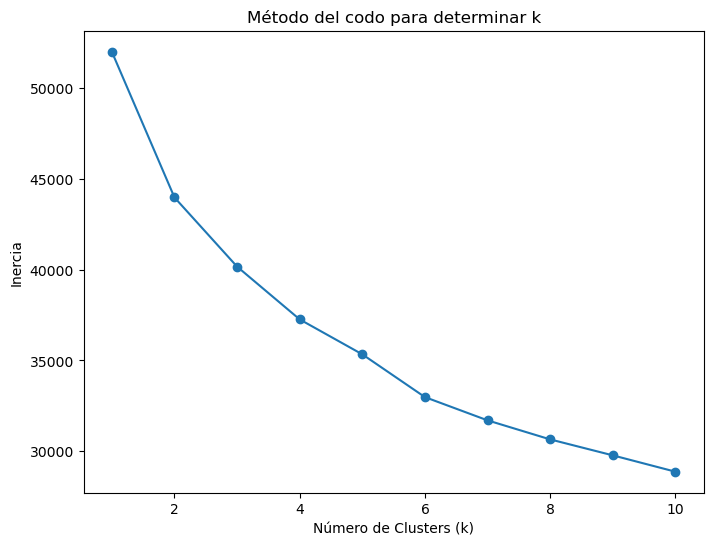

In [40]:
# graficar la inercia en función de k

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')

plt.show()

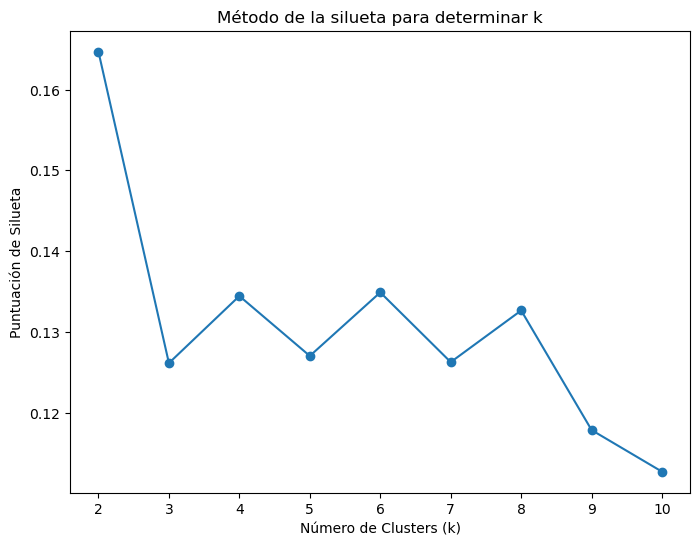

In [41]:
# graficar la puntuación de silueta en función de k

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la silueta para determinar k')

plt.show()

### Evaluación

- Analizando los gráficos el número óptimo de __clústeres__ es entre 5 y 6

In [42]:
# estandardizar los datos

scaler = StandardScaler()

data_standardized = scaler.fit_transform(data[columnas_originales])
data_standardized_df = pd.DataFrame(data_standardized, columns=columnas_originales)

data_standardized_df.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472,-0.600839
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014,-0.600839
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019,-0.600839
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450,-0.600839
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542,-0.600839
5,0.979706,0.427881,-0.973842,-0.667931,0.326813,-0.809219,1.194032,1.478149,3.153301,-0.792873,-0.193329,0.765805,0.826346,-0.600839
6,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,0.864268,-0.546766,0.400224,-0.460081,-0.761301,-0.465257,-0.600839
7,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,-0.837498,0.250387,0.735316,-0.792873,-0.993585,-0.684602,-0.681689,1.664340
8,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,1.194032,-1.898197,-1.053872,-0.792873,-0.726833,-0.794941,-0.672242,-0.600839
9,-1.020715,0.427881,-0.973842,-0.667931,0.326813,-0.809219,-0.837498,0.557327,-0.847310,-0.792873,1.940689,-0.070123,0.175076,-0.600839


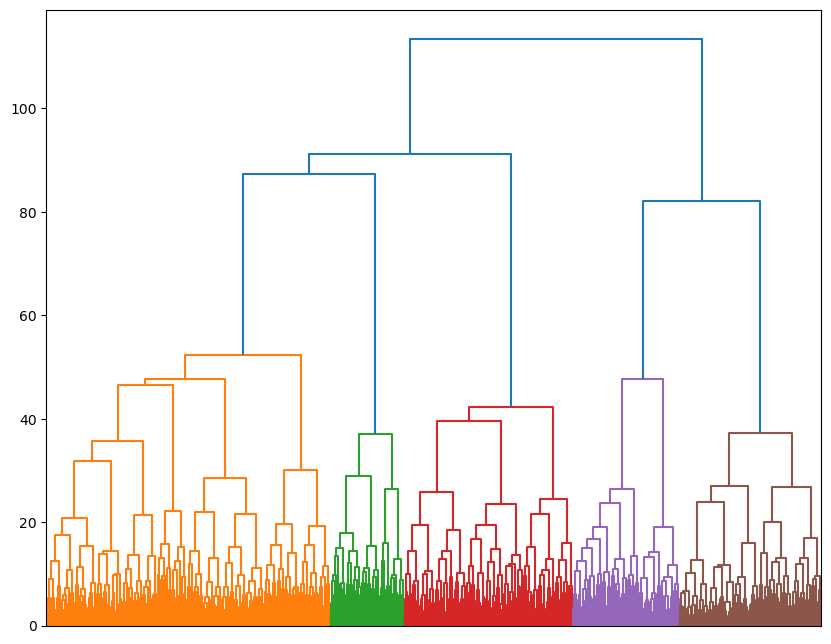

In [43]:
# mostrar dendograma

linked = linkage(data_standardized_df, method='ward')

plt.figure(figsize=(10, 8))  
dendrogram(
    linked, orientation='top', labels=data.index, 
    distance_sort='descending', show_leaf_counts=True
)

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

### Evaluación 

- La división de los valores en __5 clusters__ parece __bien distribuida__

In [44]:
# entrenar el modelo con 5 clusters

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [45]:
# agregar la columna `cluster` al DataFrame `X`

X['cluster'] = labels

X.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,1
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,4
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,1


### Evaluación

- Agregamos una nueva columna para __agrupar los datos__ en función del __cluster__

## Distribución de los valores por cluster

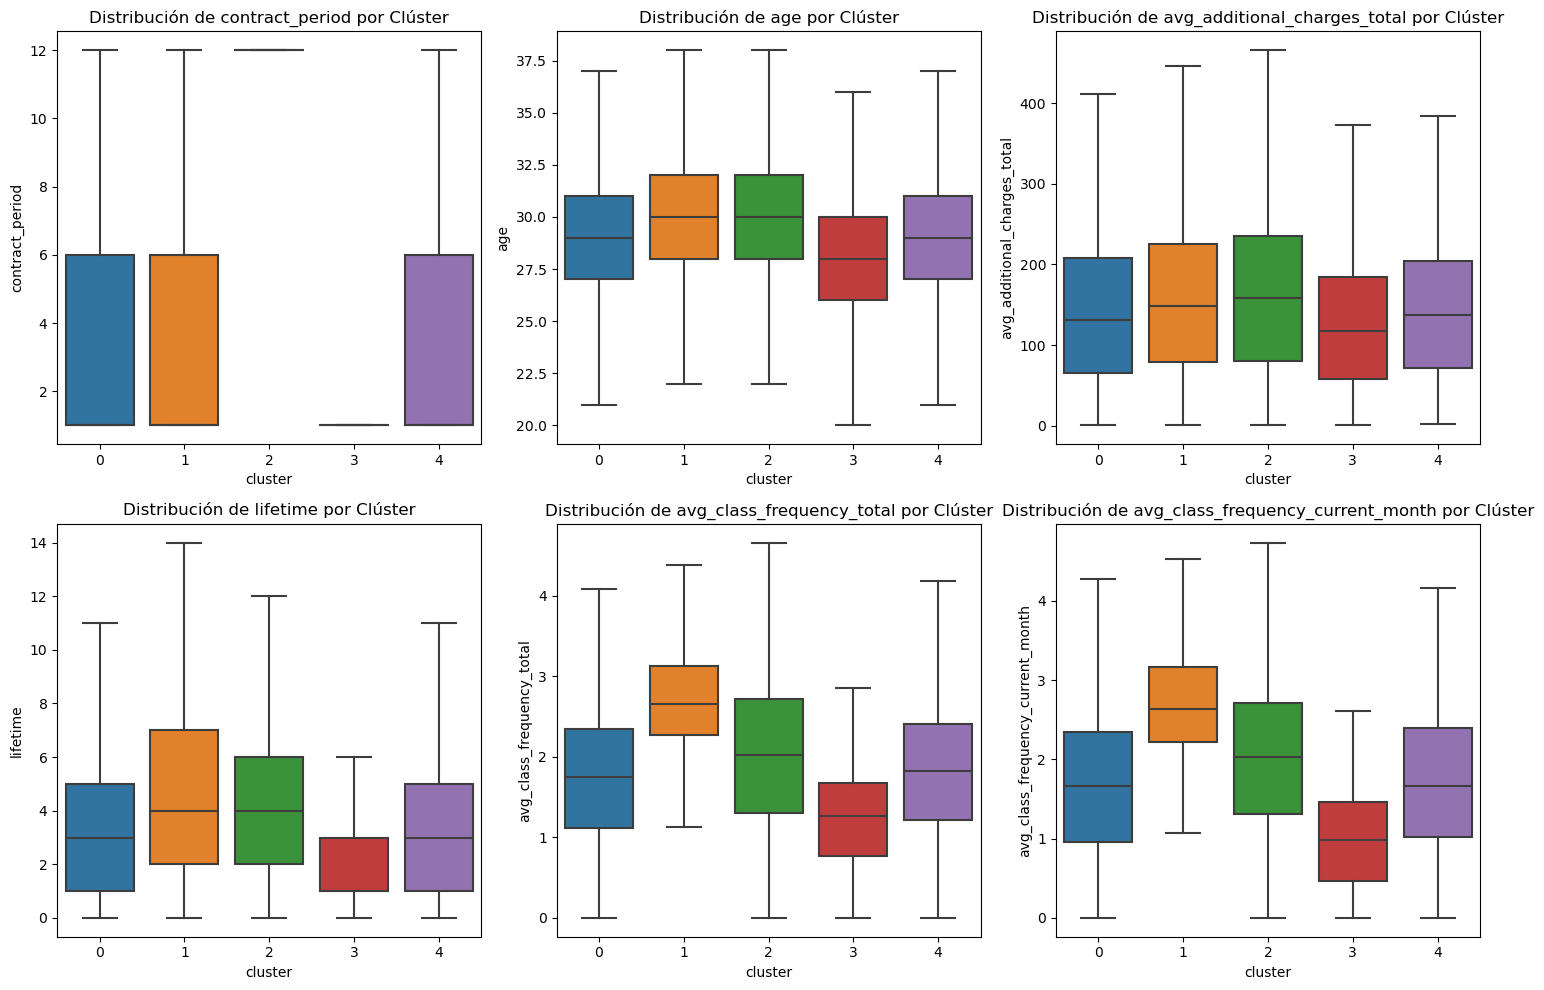

In [46]:
# distribución de los datos por cluster

columnas_originales = [
    'contract_period', 'age', 'avg_additional_charges_total',
     'lifetime', 'avg_class_frequency_total',
    'avg_class_frequency_current_month'
]

num_cols = 3
num_rows = (len(columnas_originales) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columnas_originales, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='cluster', y=col, data=X, sym="")
    plt.title(f'Distribución de {col} por Clúster')

plt.tight_layout()

plt.show()

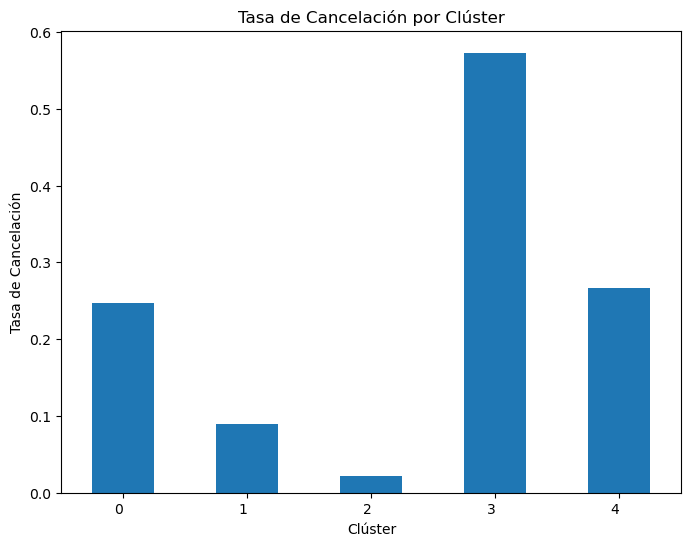

In [47]:
# calcular la tasa de cancelación por clúster

X['churn'] = data['churn']

cancelation_rate_by_cluster = X.groupby('cluster')['churn'].mean()

cancelation_rate_by_cluster.plot(kind='bar', figsize=(8, 6))

plt.title('Tasa de Cancelación por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Cancelación')

plt.xticks(rotation=0, ha='right')

plt.show()

### Evaluación

- Es muy evidente cuales categorías representan los usuarios con mayor __riesgo de cancelación__
- El Cluster 3 tiene la __tasa de cancelación__ más alta
- En los gráficos de caja se pueden identificar los grupos de enfoque para mejorar la __tasa de retención__

## Recomendaciones

- Ofrecer descuentos a los usuarios más __jóvenes__
- Ofrecer descuentos a los usuarios que eligen __contratos a largo plazo__
- Proporcionar descuentos a los __nuevos usuarios__ en su primera visita
- Ofrecer descuentos a los usuarios que participan en __clases__
- Proporcionar descuentos a los usuarios que participan en más __actividades grupales__

Para mejorar la __tasa de retención__, una estrategia efectiva podría ser fomentar la transición de los usuarios del grupo 3 al grupo 2